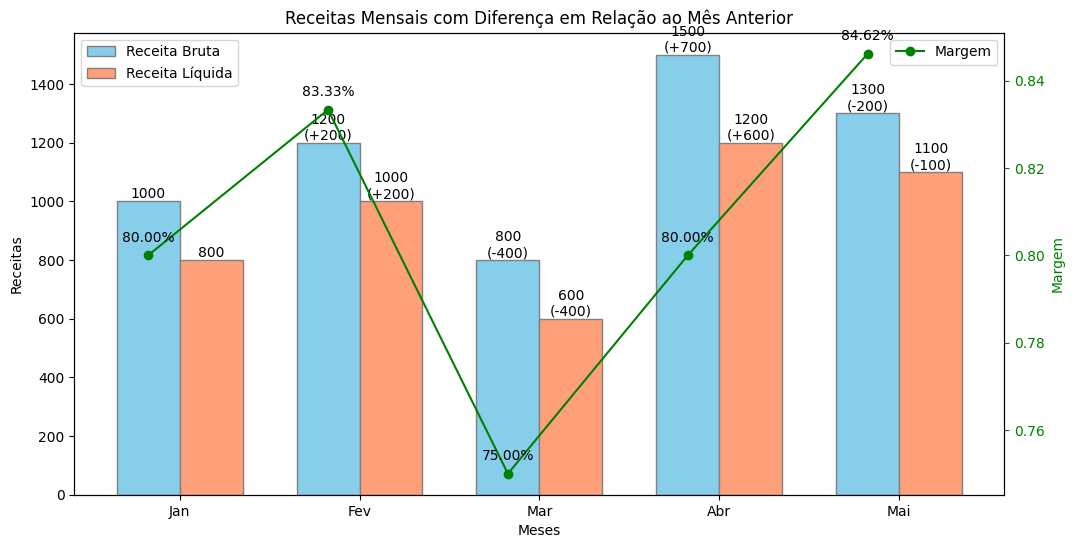

In [37]:
import matplotlib.pyplot as plt
import numpy as np

def criar_grafico(receita_bruta, receita_liquida):
    meses = list(receita_bruta.keys())
    valores_bruta = list(receita_bruta.values())
    valores_liquida = list(receita_liquida.values())

    # Calcula a diferença em relação ao mês anterior para receita bruta e líquida
    diferenca_bruta = [valores_bruta[i] - valores_bruta[i-1] if i > 0 else 0 for i in range(len(valores_bruta))]
    diferenca_liquida = [valores_liquida[i] - valores_liquida[i-1] if i > 0 else 0 for i in range(len(valores_liquida))]

    # Calcula a margem como a razão entre valores_liquida e valores_bruta
    margens_mensais = [val_liquida / val_bruta if val_bruta != 0 else 0 for val_bruta, val_liquida in zip(valores_bruta, valores_liquida)]

    # Cria o gráfico de barras agrupadas e gráfico de linha com tamanho maior
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Adiciona as barras de receita bruta e líquida com cores claras
    barWidth = 0.35
    r1 = np.arange(len(valores_bruta))
    r2 = [x + barWidth for x in r1]

    bars_bruta = ax1.bar(r1, valores_bruta, width=barWidth, color='#87CEEB', edgecolor='grey', label='Receita Bruta')
    bars_liquida = ax1.bar(r2, valores_liquida, width=barWidth, color='#FFA07A', edgecolor='grey', label='Receita Líquida')

    # Adiciona os valores de receita bruta e diferença acima das barras de receita bruta
    for i, (bar, val_bruta, val_liquida, diff_bruta) in enumerate(zip(bars_bruta, valores_bruta, valores_liquida, diferenca_bruta)):
        height = bar.get_height()
        if i > 0:
            if diff_bruta >= 0:
                ax1.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f"{val_bruta}\n({diff_bruta:+.0f})", ha='center', va='bottom', color='black')
            else:
                ax1.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f"{val_bruta}\n({diff_bruta:.0f})", ha='center', va='bottom', color='black')
        else:
            ax1.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f"{val_bruta}", ha='center', va='bottom', color='black')

    # Adiciona os valores de receita líquida e diferença acima das barras de receita líquida
    for i, (bar, val_bruta, val_liquida, diff_liquida) in enumerate(zip(bars_liquida, valores_bruta, valores_liquida, diferenca_liquida)):
        height = bar.get_height()
        if i > 0:
            if diff_liquida >= 0:
                ax1.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f"{val_liquida}\n({diff_liquida:+.0f})", ha='center', va='bottom', color='black')
            else:
                ax1.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f"{val_liquida}\n({diff_liquida:.0f})", ha='center', va='bottom', color='black')
        else:
            ax1.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f"{val_liquida}", ha='center', va='bottom', color='black')

    # Adiciona rótulos e título para o eixo Y da esquerda
    ax1.set_xlabel('Meses')
    ax1.set_ylabel('Receitas', color='black')
    ax1.tick_params('y', colors='black')
    ax1.set_title('Receitas Mensais com Diferença em Relação ao Mês Anterior')
    ax1.set_xticks([r + barWidth/2 for r in range(len(valores_bruta))])
    ax1.set_xticklabels(meses)

    # Adiciona legenda para o eixo Y da esquerda
    ax1.legend(loc='upper left')

    # Adiciona o eixo Y da direita para a margem (gráfico de linha)
    ax2 = ax1.twinx()
    linha_margem = ax2.plot(meses, margens_mensais, color='green', marker='o', label='Margem')

    # Adiciona os valores de margem próximos aos pontos da linha
    for i, txt in enumerate(margens_mensais):
        ax2.annotate(f"{txt:.2%}", (meses[i], margens_mensais[i]), textcoords="offset points", xytext=(0,10), ha='center')

    ax2.set_ylabel('Margem', color='green')
    ax2.tick_params('y', colors='green')

    # Adiciona legenda para o eixo Y da direita
    ax2.legend(loc='upper right')

    # Exibe o gráfico
    plt.show()

# Exemplo de dados de receita bruta e receita líquida (substitua com seus próprios dados)
receita_bruta = {'Jan': 1000, 'Fev': 1200, 'Mar': 800, 'Abr': 1500, 'Mai': 1300}
receita_liquida = {'Jan': 800, 'Fev': 1000, 'Mar': 600, 'Abr': 1200, 'Mai': 1100}

# Chama a função para criar o gráfico
criar_grafico(receita_bruta, receita_liquida)
